In [1]:
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
import numpy as np
import h5py

In [2]:

with h5py.File("GradsV3.hdf5", "r") as f:
    grads_arr = f['grads'][:]

In [3]:
print(grads_arr)

[[-2.60262925e+14 -1.44251961e+17 -4.14686588e+16 -6.23643867e+08
   9.36326491e+09 -1.25392211e+03  1.00834840e+09  9.27425792e+08
  -1.75891493e+10  2.37113522e+04  8.75353765e+02 -1.70709640e+08]
 [-2.44865429e+15 -1.63374837e+17 -3.54204403e+16 -4.76318649e+08
   9.18593338e+09 -2.05064633e+04  8.13560053e+08  1.17390416e+09
  -9.85753893e+09  4.83001654e+04  7.55324272e+02 -2.70158484e+08]
 [-1.43846053e+15 -1.82759484e+17 -3.78532570e+16 -4.88503101e+08
   9.26956820e+09 -2.01784408e+04  2.12674738e+09  2.26940387e+09
  -1.61585047e+10  2.43877792e+04  5.30323433e+02 -1.40909594e+08]
 [-4.97556877e+14 -1.57044931e+17 -4.07029522e+16 -4.20323938e+08
   9.34437461e+09 -8.55126494e+03  2.19127446e+09  2.43626551e+09
  -2.33152324e+10  1.69101260e+04  5.91328337e+02 -1.68703526e+08]
 [-1.33568901e+14 -1.41424427e+17 -4.19233505e+16 -4.68402861e+08
   9.37373666e+09 -9.82326972e+02  8.47586453e+08  1.99807917e+09
  -2.27266399e+10  1.99328352e+04  7.83363146e+02 -1.15575436e+08]
 [-4.

In [4]:
print(grads_arr.shape)

(30, 12)


In [5]:
n_samples, n_params = grads_arr.shape

print(grads_arr.max(keepdims=True, axis=-1))
G = (grads_arr - grads_arr.mean(keepdims=True, axis=0)) / grads_arr.max(keepdims=True, axis=-1)

[[9.36326491e+09]
 [9.18593338e+09]
 [9.26956820e+09]
 [9.34437461e+09]
 [9.37373666e+09]
 [9.34973292e+09]
 [9.16468770e+09]
 [9.36574095e+09]
 [9.35889630e+09]
 [9.34729434e+09]
 [9.37262936e+09]
 [9.32899005e+09]
 [9.24771748e+09]
 [9.37534109e+09]
 [9.30105415e+09]
 [9.32716900e+09]
 [9.36671059e+09]
 [9.30156714e+09]
 [9.19603234e+09]
 [9.35825130e+09]
 [9.37391733e+09]
 [9.37070923e+09]
 [9.37688938e+09]
 [9.31023673e+09]
 [9.33559684e+09]
 [9.31936066e+09]
 [9.25638323e+09]
 [9.36229188e+09]
 [9.23110812e+09]
 [9.24737967e+09]]


In [6]:


# n_samples, n_params = grads_arr.shape
# G = grads_arr / np.max(grads_arr)[1]
Sigma = (G.T @ G) / n_samples       

# variances = np.diag(Sigma)               
# stds = np.sqrt(variances)               
# outer_stds = np.outer(stds, stds)       
# eps = 1e-12
# Sigma = Sigma / (outer_stds + eps)
# np.fill_diagonal(Sigma, 1.0)


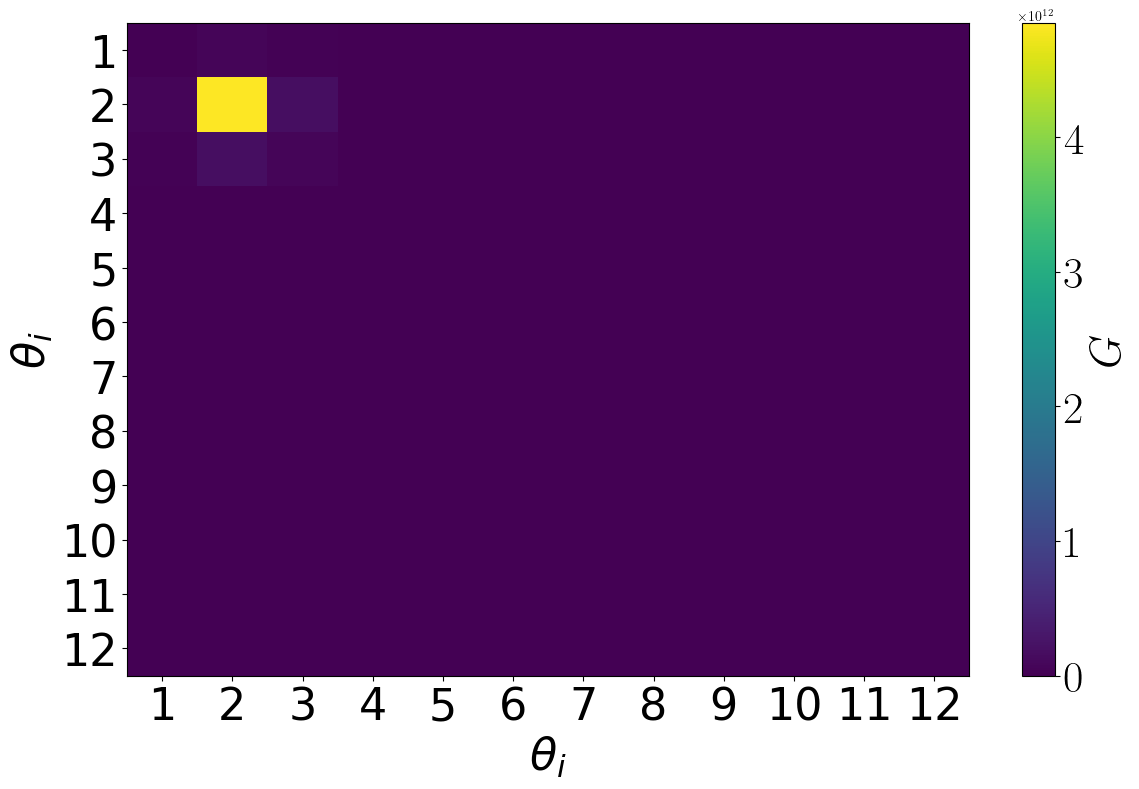

In [7]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'

# im = ax.imshow(
#     np.abs(Sigma),
#     cmap='viridis',
#     aspect='auto',
#     interpolation='nearest',
#     norm=LogNorm(vmin=np.abs(Sigma).min()+1e-6, vmax=np.abs(Sigma).max()),  # avoid vmin=0
# )
im = ax.imshow(
    np.abs(Sigma),
    cmap='viridis',
    aspect='auto',
    interpolation='nearest',
)

cbar = fig.colorbar(im, ax=ax, label='G')
cbar.set_label(r'$G$', fontsize=32)
cbar.ax.tick_params(labelsize=32)
ax.tick_params(axis='x', labelsize=32)
ax.tick_params(axis='y', labelsize=32)
plt.xlabel(r'$\theta_i$', fontsize=32)
plt.ylabel(r'$\theta_i$', fontsize=32)

ax.set_xticks(np.arange(Sigma.shape[1]))
ax.set_yticks(np.arange(Sigma.shape[0]))

ax.set_xticklabels(np.arange(1, Sigma.shape[1]+1))
ax.set_yticklabels(np.arange(1, Sigma.shape[0]+1))
plt.tight_layout()

# plt.savefig("Cov_Grad_heatmap.png")


    